In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
#  LOAD DATASET
# Using a direct link to the King County Housing dataset (Size, Bedrooms, Location included)
url = "https://raw.githubusercontent.com/jmatth11/King-County-House-Data-Set/master/kc_house_data.csv"
df = pd.read_csv(url)

print("Dataset Preview:")
display(df.head())

Dataset Preview:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#  PREPROCESSING
# Selecting specific features as per task: Size (sqft_living), Bedrooms, and Location (zipcode)
features = ['sqft_living', 'bedrooms', 'zipcode']
X = df[features]
y = df['price']

# Handling any missing values
X = X.fillna(X.mean())

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#  TRAIN GRADIENT BOOSTING MODEL
# Gradient Boosting is highly effective for tabular real estate data
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [18]:
#  PREDICTIONS
y_pred = model.predict(X_test)

In [19]:
#  EVALUATION (MAE & RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("-" * 30)
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print("-" * 30)

------------------------------
Mean Absolute Error (MAE): $100,613.81
Root Mean Squared Error (RMSE): $202,658.71
------------------------------


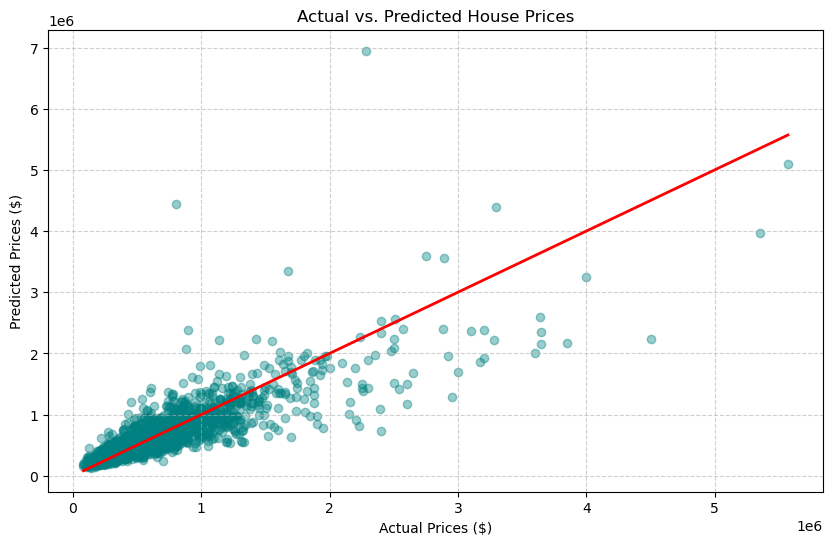

In [20]:
#  VISUALIZATION
plt.figure(figsize=(10, 6))

# Plotting Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # Identity line

plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()